# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark", palette='flare')
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [121]:
df= pd.read_csv('SINASC_RO_2019.csv')
df.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [122]:
df[['IDADEMAE','IDADEPAI','munResNome']].groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


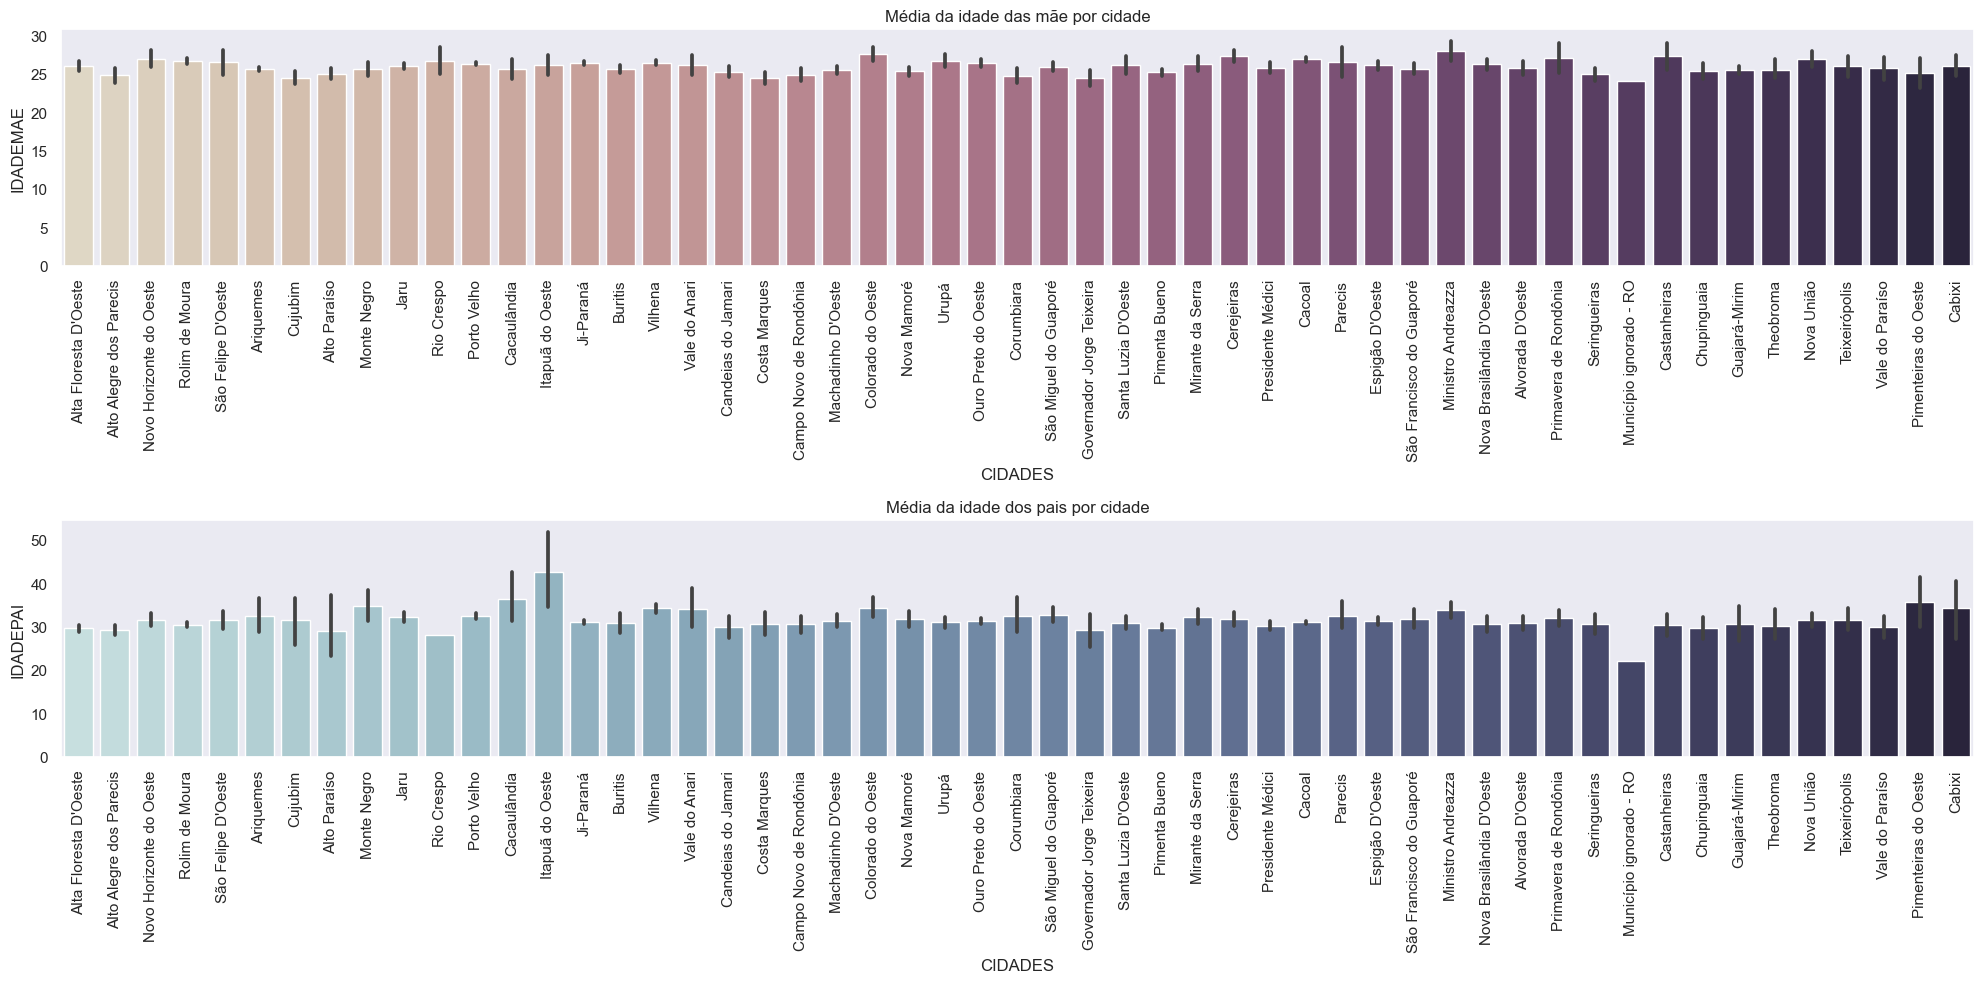

In [146]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10))


sns.barplot(data=df, ax=ax[0], x='munResNome', y='IDADEMAE',palette="ch:s=-.2,r=.6")
sns.barplot(data=df, ax=ax[1], x='munResNome', y='IDADEPAI',palette="ch:start=.2,rot=-.3")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title('Média da idade das mãe por cidade')
ax[1].set_title('Média da idade dos pais por cidade')
ax[0].set_xlabel('CIDADES')
ax[1].set_xlabel('CIDADES')
plt.tight_layout()
plt.show()

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [124]:
#Separando o data frame com menos colunas
df2 = df.loc[:,['PESO','ESCMAE','DTNASC','SEXO']]
df2['DTNASC']=pd.to_datetime(df2['DTNASC'])
df2['DTNASC'] = df2['DTNASC'].apply(lambda x: x.strftime('%m-%d'))

In [125]:
df2.head()

,PESO,ESCMAE,DTNASC,SEXO
0,3685,8 a 11 anos,02-19,Masculino
1,3055,8 a 11 anos,02-21,Feminino
2,3460,8 a 11 anos,02-25,Feminino
3,2982,12 anos ou mais,03-20,Feminino
4,3310,8 a 11 anos,03-23,Feminino


In [126]:
df2.DTNASC.value_counts()

04-10    116
03-21    109
09-25    108
09-02    105
12-04    104
        ... 
12-25     44
02-09     44
07-28     44
08-04     43
11-03     40
Name: DTNASC, Length: 365, dtype: int64

In [127]:
#Nasci 11/07
df2 = df2.loc[df2['DTNASC']=='07-11',:]
df2

,PESO,ESCMAE,DTNASC,SEXO
13861,3240,8 a 11 anos,07-11,Feminino
13862,2710,4 a 7 anos,07-11,Masculino
13947,3260,8 a 11 anos,07-11,Feminino
13948,3754,8 a 11 anos,07-11,Masculino
15143,3310,8 a 11 anos,07-11,Masculino
...,...,...,...,...
26031,3330,8 a 11 anos,07-11,Feminino
26032,2684,4 a 7 anos,07-11,Feminino
26197,3410,8 a 11 anos,07-11,Masculino
26617,3885,8 a 11 anos,07-11,Feminino


In [128]:
df2.groupby(['ESCMAE','SEXO']).agg('mean')

PESO
ESCMAE          SEXO                  
1 a 3 anos      Feminino   3052.500000
12 anos ou mais Feminino   3455.000000
                Masculino  3270.714286
4 a 7 anos      Feminino   2859.800000
                Masculino  3138.750000
8 a 11 anos     Feminino   3262.240000
                Masculino  3405.904762

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [129]:
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df[['DTNASC','munResNome']].groupby('munResNome').count().sort_values('DTNASC')
#ACREDITO QUE ESSE PRIMEIRO NÃO SEJA UM MUNICÍPIO ENTÃO VOU FAZER COM 'CASTANHEIRAS'

,DTNASC
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


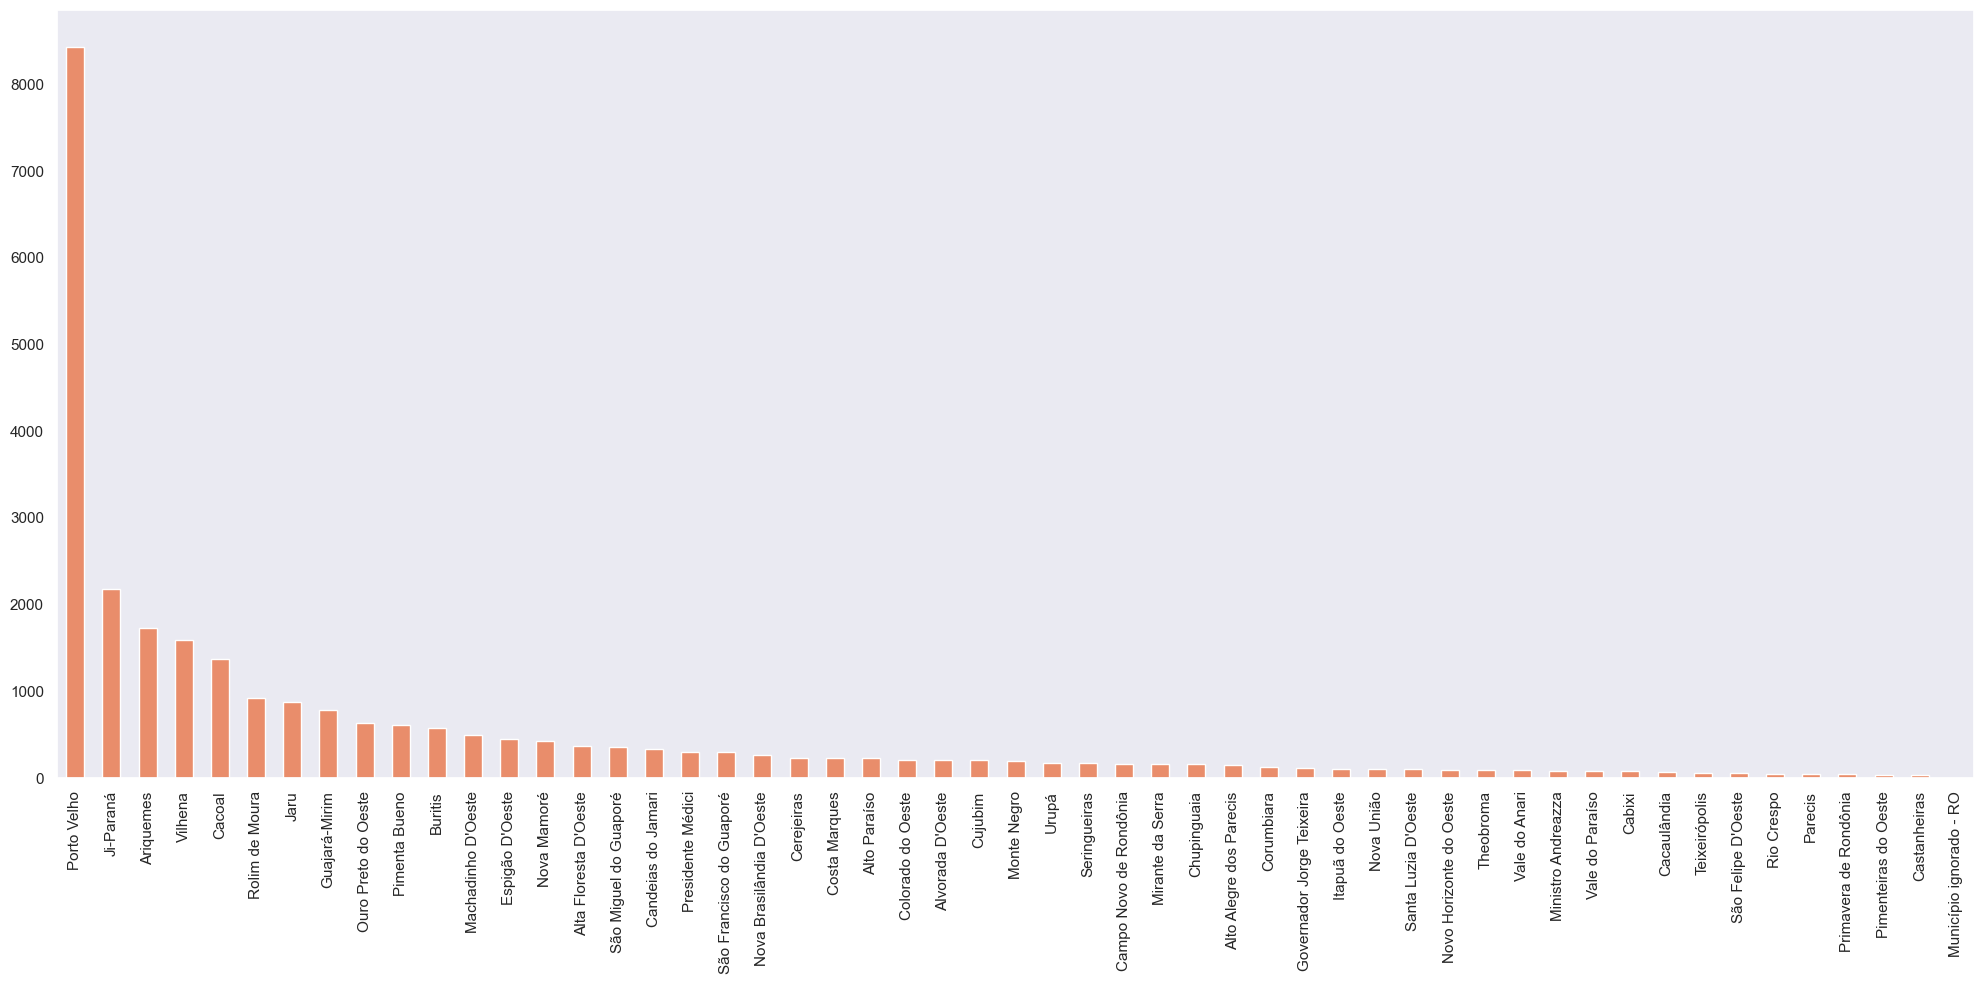

In [130]:
plt.figure(figsize=(20,10))
df['munResNome'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

dade media, maxima, minima das maes nesse municipio?

In [131]:
res = df[['munResNome','IDADEMAE']].groupby('munResNome').agg(['mean','min','max']).reset_index()
display(res[res['munResNome'] == 'Castanheiras'])

munResNome  IDADEMAE        
                      mean min max
11  Castanheiras  27.28125  17  39

idade media, maxima, minima dos pais nesse municipio?

In [132]:
res = df[['munResNome','IDADEPAI']].groupby('munResNome').agg(['mean','min','max']).reset_index()
display(res[res['munResNome'] == 'Castanheiras'])

munResNome   IDADEPAI            
                       mean   min   max
11  Castanheiras  30.392857  17.0  43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [133]:
df['MES'] = df['DTNASC'].apply(lambda x: x.strftime('%b'))
res = df[df['MES']=='Mar']
res['munResNome'].value_counts()

Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Machadinho D'Oeste            44
Espigão D'Oeste               44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alto Paraíso                  22
Alvorada D'Oeste              22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14
Vale do Pa

In [134]:
result = res[['MES','munResNome']].groupby('munResNome').count().sort_values('MES',ascending=False).head()
display(result)
print('O município que mais nasceu bebê em março foi:',end=' ')
result['MES'].idxmax()
print(result['MES'].idxmax())

,MES
munResNome,
Porto Velho,744
Ji-Paraná,188
Vilhena,148
Ariquemes,141
Cacoal,133


O município que mais nasceu bebê em março foi: Porto Velho


**O método idxmax em pandas retorna o rótulo do índice (ou rótulos, no caso de um DataFrame com múltiplas colunas) do primeiro valor máximo ao longo do eixo especificado. No contexto de uma Series, idxmax retorna o índice do valor máximo.**

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [135]:
df.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
MES            object
Length: 70, dtype: object

In [136]:
df.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf,MES
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,Feb
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,Feb
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,Feb
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,Mar
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia,Dec
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia,Oct
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia,Aug
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia,Dec


In [137]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea', 'MES'],
      dtype='ob

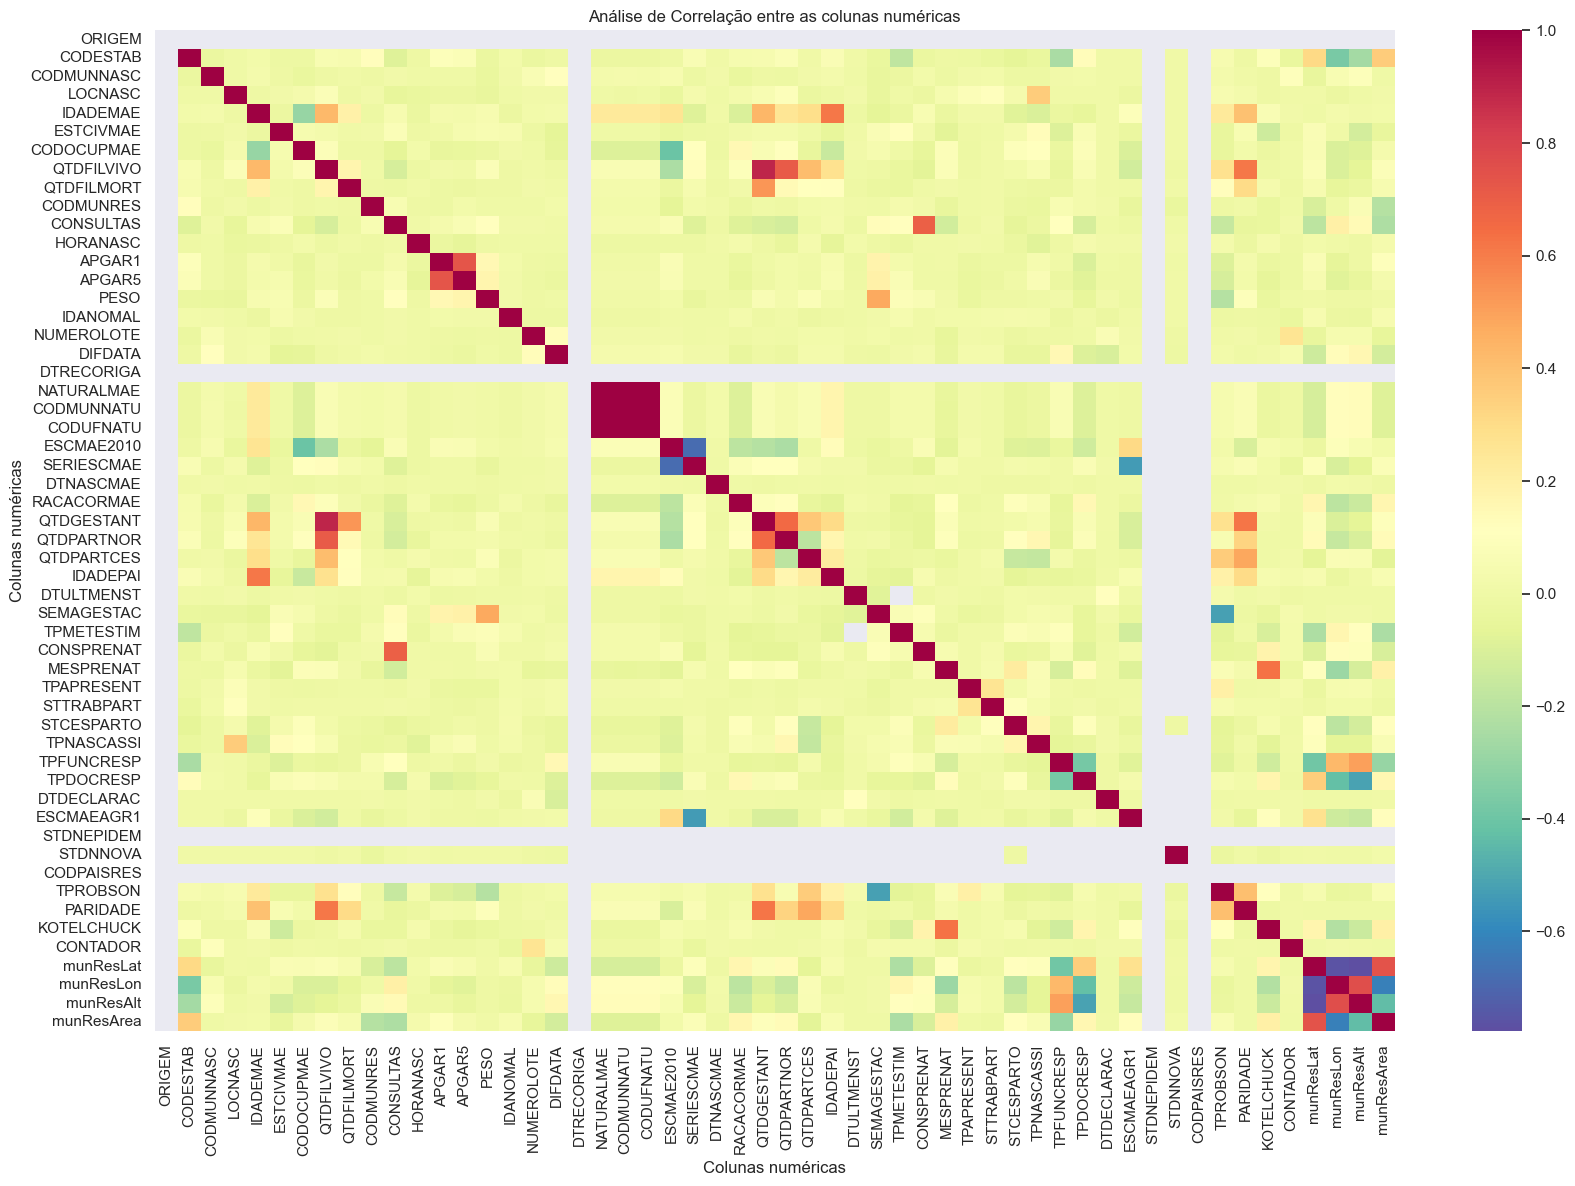

In [138]:
plt.figure(figsize=(20,13));
f = sns.heatmap(df.corr(), annot=False, cmap='Spectral_r') 

f.set(title="Análise de Correlação entre as colunas numéricas", xlabel='Colunas Numéricas'.capitalize(), ylabel='Colunas numéricas')
plt.show(f)

In [139]:
res = df[['CONSPRENAT','APGAR1','PESO','APGAR5','SEXO','GESTACAO','PARTO','SEMAGESTAC','MES','ESCMAE']]
res

,CONSPRENAT,APGAR1,PESO,APGAR5,SEXO,GESTACAO,PARTO,SEMAGESTAC,MES,ESCMAE
0,8.0,9.0,3685,10.0,Masculino,37 a 41 semanas,Cesáreo,39.0,Feb,8 a 11 anos
1,10.0,8.0,3055,9.0,Feminino,37 a 41 semanas,Cesáreo,38.0,Feb,8 a 11 anos
2,8.0,8.0,3460,10.0,Feminino,37 a 41 semanas,Cesáreo,40.0,Feb,8 a 11 anos
3,6.0,9.0,2982,10.0,Feminino,37 a 41 semanas,Cesáreo,38.0,Mar,12 anos ou mais
4,8.0,8.0,3310,10.0,Feminino,37 a 41 semanas,Cesáreo,38.0,Mar,8 a 11 anos
...,...,...,...,...,...,...,...,...,...,...
27023,7.0,8.0,2110,9.0,Masculino,32 a 36 semanas,Cesáreo,33.0,Dec,12 anos ou mais
27024,12.0,8.0,3310,9.0,Masculino,37 a 41 semanas,Vaginal,39.0,Oct,8 a 11 anos
27025,8.0,9.0,3065,10.0,Masculino,37 a 41 semanas,Cesáreo,39.0,Aug,8 a 11 anos
27026,10.0,8.0,2352,9.0,Masculino,32 a 36 semanas,Vaginal,35.0,Dec,8 a 11 anos


In [140]:
res.dtypes

CONSPRENAT    float64
APGAR1        float64
PESO            int64
APGAR5        float64
SEXO           object
GESTACAO       object
PARTO          object
SEMAGESTAC    float64
MES            object
ESCMAE         object
dtype: object

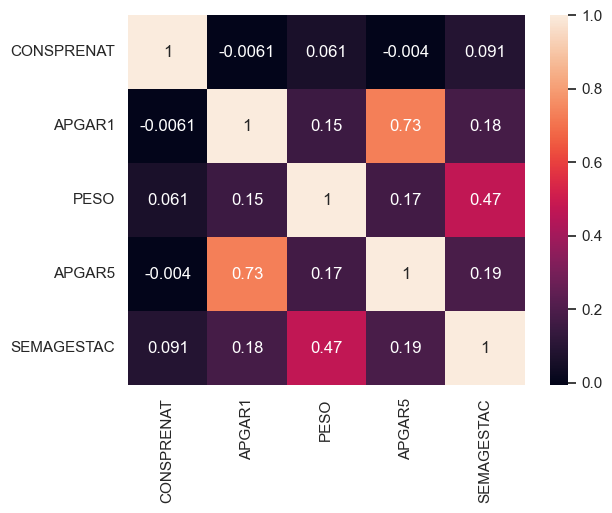

In [141]:
sns.heatmap(res.corr(),annot=True);

 ## Relação entre o número de consultas pré natais com a escolaridade da mãe e também com o tipo de gestação
 
**Será que a escolaridade da mãe pode impactar no número de consultas pre natais? E o número de consultas, pode nos dizer ou prever em média o tempo de gestação?**

<AxesSubplot:xlabel='ESCMAE', ylabel='CONSPRENAT'>

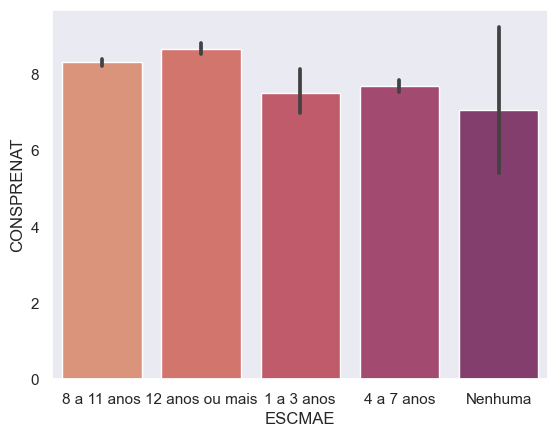

In [142]:
sns.barplot(data=df,x='ESCMAE',y='CONSPRENAT')

<AxesSubplot:xlabel='ESCMAE'>

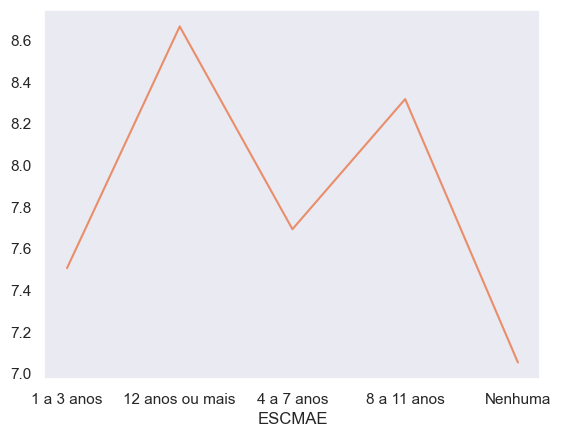

In [143]:
res.groupby('ESCMAE')['CONSPRENAT'].mean().plot()


Parece que elas têm uma certa correlação, veja que a medida que o nível de escolaridade vai aumentando, o número médio de consultas também. Um fator pode ser talvez o quanto de dinheiro aquela pessoa possui? Não sabemos, pois apesar da escolaridade ter uma relação com níveis educacionais, nunca se é uma regra. Mas parece sem um ponto interessante a se aprofundar. 

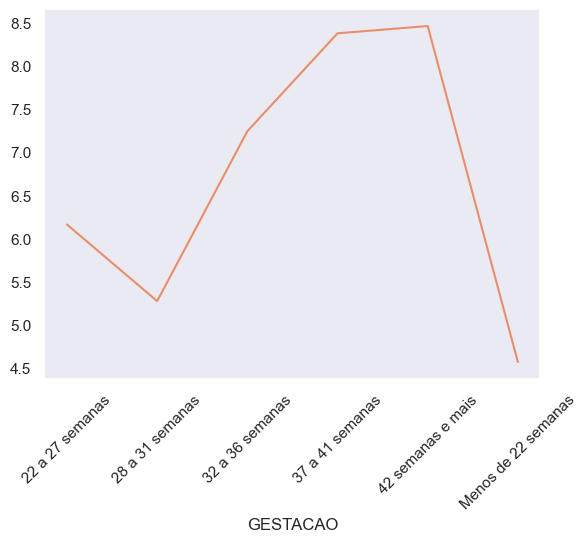

In [144]:
res.groupby('GESTACAO')['CONSPRENAT'].mean().plot()
plt.xticks(rotation=45);

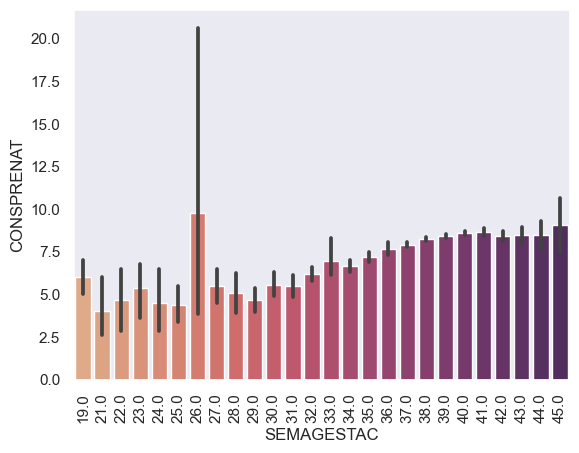

In [145]:
sns.barplot(data=res,x='SEMAGESTAC',y='CONSPRENAT',palette='flare')
plt.xticks(rotation=90);plt.show()

Aqui não parece ser algo tão natural, mas em teoria quanto mais tempo de gestação a mae passou, mais consultas pré-natais ela fez. Não parece ser muito uma regra, porque temos uma pequena anomalia, quando obeservamos o comportamento em 28-31 semanas, que vai abaixo de 22-27. Mas depois disso a análise segue perfeitamente, uma cresce em relação a outra. Segundo gráfico fica mais claro